In [28]:
from pprint import pprint
import time
import requests
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from config import rapidapi_key
import datetime
import math

# Unorganized Data

In [29]:
#reading in all covid19 data

time_series_ncov_Confirmed =pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Confirmed.csv')
time_series_ncov_Deaths = pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Deaths.csv')
time_series_ncov_Recovered =pd.read_csv('../../../mvp/data/covid19_data/time_series-ncov-Recovered.csv')

In [30]:
#Removing Unecessary Columns in each data frame
time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop(columns =['Province/State'])
time_series_ncov_Deaths =time_series_ncov_Deaths.drop(columns =['Province/State'])
time_series_ncov_Recovered =time_series_ncov_Recovered.drop(columns =['Province/State'])
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Value
0,#country+name,#geo+lat,#geo+lon,#date,#affected+infected+value+num
1,Afghanistan,33.0,65.0,2020-03-23,40
2,Afghanistan,33.0,65.0,2020-03-22,40
3,Afghanistan,33.0,65.0,2020-03-21,24
4,Afghanistan,33.0,65.0,2020-03-20,24


In [31]:
#Removing unecessary rows in each data set

time_series_ncov_Confirmed =time_series_ncov_Confirmed.drop([0], axis = 0)
time_series_ncov_Deaths =time_series_ncov_Deaths.drop([0], axis = 0)
time_series_ncov_Recovered =time_series_ncov_Recovered.drop([0], axis = 0)
time_series_ncov_Deaths.head()



# Changing all value columns to numeric for analysis
time_series_ncov_Confirmed["Value"] = pd.to_numeric(time_series_ncov_Confirmed["Value"])
time_series_ncov_Deaths["Value"] = pd.to_numeric(time_series_ncov_Deaths["Value"])
time_series_ncov_Recovered["Value"] = pd.to_numeric(time_series_ncov_Recovered["Value"])


time_series_ncov_Confirmed["Date"] = pd.to_datetime(time_series_ncov_Confirmed["Date"])
time_series_ncov_Deaths["Date"] = pd.to_datetime(time_series_ncov_Deaths["Date"])
time_series_ncov_Recovered["Date"] = pd.to_datetime(time_series_ncov_Recovered["Date"])

time_series_ncov_Confirmed.dtypes

#Renaming value columns to be easier to analyze

time_series_ncov_Confirmed= time_series_ncov_Confirmed.rename(columns ={'Value':'Confirmed Cases'})
time_series_ncov_Deaths= time_series_ncov_Deaths.rename(columns ={'Value':'Deaths'})
time_series_ncov_Recovered= time_series_ncov_Recovered.rename(columns ={'Value':'Recoveries'})
time_series_ncov_Confirmed.head()

,Country/Region,Lat,Long,Date,Confirmed Cases
1,Afghanistan,33.0,65.0,2020-03-23,40.0
2,Afghanistan,33.0,65.0,2020-03-22,40.0
3,Afghanistan,33.0,65.0,2020-03-21,24.0
4,Afghanistan,33.0,65.0,2020-03-20,24.0
5,Afghanistan,33.0,65.0,2020-03-19,22.0


In [32]:
#Grouping all dataframes by country/region and the date to get total values for each data set

time_series_nconv_Confirmed = time_series_ncov_Confirmed.groupby(['Country/Region','Date']).sum()['Confirmed Cases']
time_series_nconv_Deaths = time_series_ncov_Deaths.groupby(['Country/Region','Date']).sum()['Deaths']
time_series_nconv_Recovered = time_series_ncov_Recovered.groupby(['Country/Region','Date']).sum()['Recoveries']

confirmed_all = pd.DataFrame({
    "Confirmed Cases": time_series_nconv_Confirmed,
    "Deaths": time_series_nconv_Deaths,
    "Recoveries": time_series_nconv_Recovered
})
confirmed_all.head()

Confirmed Cases  Deaths  Recoveries
Country/Region Date                                           
Afghanistan    2020-01-22              0.0     0.0         0.0
               2020-01-23              0.0     0.0         0.0
               2020-01-24              0.0     0.0         0.0
               2020-01-25              0.0     0.0         0.0
               2020-01-26              0.0     0.0         0.0

In [40]:
italy_df = confirmed_all.loc["Italy"]
italy_df.sort_values(by = "Deaths", ascending = False)

,Confirmed Cases,Deaths,Recoveries
Date,,,
2020-03-23,59138.0,5476.0,7024.0
2020-03-22,59138.0,5476.0,7024.0
2020-03-21,53578.0,4825.0,6072.0
2020-03-20,47021.0,4032.0,4440.0
2020-03-19,41035.0,3405.0,4440.0
...,...,...,...
2020-02-17,3.0,0.0,0.0
2020-02-18,3.0,0.0,0.0
2020-02-19,3.0,0.0,0.0


In [42]:
italy_df = confirmed_all.loc["Italy"].head()

confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = italy_df['Confirmed Cases'].to_list()
deaths_list = italy_df['Deaths'].to_list()
recoveries_list = italy_df['Recoveries'].to_list()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

italy_df["New Confirmed Cases"]= new_confirmed_cases
italy_df["New Deaths"]= new_deaths
italy_df["New Recoveries"]= new_recoveries

italy_df.sort_values(by = "New Deaths", ascending = True)

,Confirmed Cases,Deaths,Recoveries,New Confirmed Cases,New Deaths,New Recoveries
Date,,,,,,
2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
#Create column for daily changes
confirm_count = 0
death_count = 0
recovery_count = 0

new_confirmed_cases =[]
new_deaths =[]
new_recoveries = []

confirmed_cases_list = confirmed_all['Confirmed Cases'].to_list()
deaths_list = confirmed_all['Deaths'].to_list()
recoveries_list = confirmed_all['Recoveries'].to_list()

unique_countries = time_series_ncov_Confirmed['Country/Region'].unique()

for i in confirmed_cases_list:
    new_confirm = i-confirm_count
    new_confirmed_cases.append(new_confirm)
    confirm_count = i

for k in deaths_list:
    new_dead = k-death_count
    new_deaths.append(new_dead)
    death_count = k

for j in recoveries_list:
    new_recover = j-recovery_count
    new_recoveries.append(new_recover)
    recovery_count = j

confirmed_all["New Confirmed Cases"]= new_confirmed_cases
confirmed_all["New Deaths"]= new_deaths
confirmed_all["New Recoveries"]= new_recoveries

In [13]:
# Want to created new columns showing the ratio between how many confirmed cases have been

# confirmed_all["Recover/Confirm Ratio"] = confirmed_all["Recoveries"]/confirmed_all["Confirmed Cases"]
confirmed_all.loc["Albania"].head()
#confirmed_all.sort_values(by = 'Recoveries')

,Confirmed Cases,Deaths,Recoveries,New Confirmed Cases,New Deaths,New Recoveries
Date,,,,,,
2020-01-22,0.0,0.0,0.0,NaN,-1.0,-1.0
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
confirmed_all.loc[["Italy"]]["Confirmed Cases"].head()


Country/Region  Date      
Italy           2020-01-22    0.0
                2020-01-23    0.0
                2020-01-24    0.0
                2020-01-25    0.0
                2020-01-26    0.0
Name: Confirmed Cases, dtype: float64

In [15]:
#confirmed_all.reset_index(inplace=True)
#fd = confirmed_all.loc[confirmed_all['Country/Region'] == 'Italy']['Confirmed Cases']

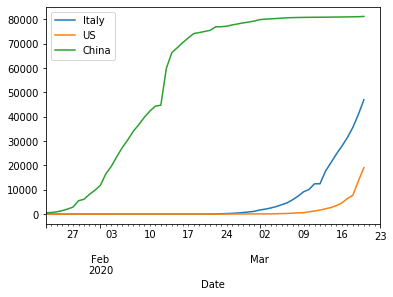

In [16]:
confirmed_group=pd.DataFrame({
    #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
    'Italy': confirmed_all.loc["Italy"]["Confirmed Cases"], 
    'US': confirmed_all.loc["US"]["Confirmed Cases"],
    'China': confirmed_all.loc["China"]["Confirmed Cases"]
})

confirmed_group.plot()
#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(years_fmt)
plt.show()
#plt.plot('x','y1', data = df, markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)



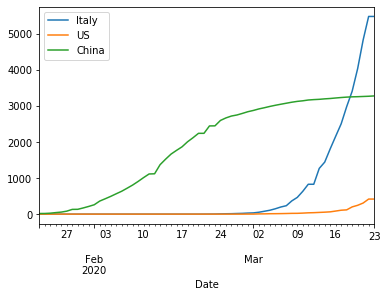

In [17]:
death_group=pd.DataFrame({
    #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
    'Italy': confirmed_all.loc["Italy"]["Deaths"], 
    'US': confirmed_all.loc["US"]["Deaths"],
    'China': confirmed_all.loc["China"]["Deaths"]
})

death_group.plot()
plt.show()

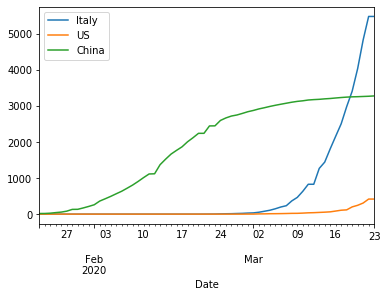

In [18]:
death_group=pd.DataFrame({
    #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
    'Italy': confirmed_all.loc["Italy"]["Deaths"], 
    'US': confirmed_all.loc["US"]["Deaths"],
    'China': confirmed_all.loc["China"]["Deaths"]
})

death_group.plot()
plt.show()

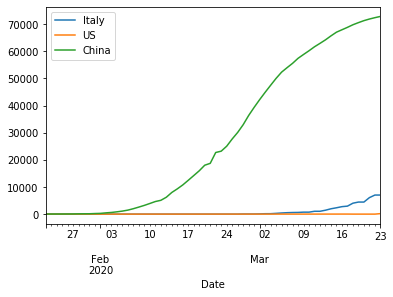

In [19]:
recoveries_group=pd.DataFrame({
    #'x': confirmed_all.loc["Italy"]['Confirmed Cases'].index,
    'Italy': confirmed_all.loc["Italy"]["Recoveries"], 
    'US': confirmed_all.loc["US"]["Recoveries"],
    'China': confirmed_all.loc["China"]["Recoveries"]
})

recoveries_group.plot()
plt.show()

In [20]:
#Line charts for confirm, death, recovered in each country

In [68]:
#Determine the dates each country experienced the largest number of confirms, deaths and recoveries
#Also determine the dates each respective stock market, had the largest increases and drops


In [69]:
#

In [70]:
#chart comparing the respective stock market along

# Italian Market

In [71]:
italy_df = pd.read_csv("../italy_index/FTSE Italia All Share Historical Data.csv")

In [72]:
italy_df

,Date,Price,Open,High,Low,Vol.,Change %,Timestamp
0,2020-3-20,17171.55,17209.93,17628.87,17047.73,1500000000,1.85,1584662400
1,2020-3-19,16859.82,16814.38,17240.13,16438.49,1270000000,2.27,1584576000
2,2020-3-18,16486.21,16372.27,16785.57,16149.48,992760000,-1.17,1584489600
3,2020-3-17,16680.56,16850.34,17238.59,16065.72,1400000000,1.96,1584403200
4,2020-3-16,16360.04,17130.96,17130.96,15498.19,1540000000,-6.06,1584316800
...,...,...,...,...,...,...,...,...
321,2018-12-7,20597.68,20650.69,20818.51,20597.68,616630000,0.49,1544140800
322,2018-12-6,20496.44,21014.83,21014.83,20433.79,1090000000,-3.38,1544054400
323,2018-12-5,21213.03,21041.15,21287.70,20990.68,691120000,-0.19,1543968000
324,2018-12-4,21254.03,21494.44,21517.80,21254.03,961020000,-1.26,1543881600


# Chinese Market

In [73]:
curr_time = int(time.time())
#prior_year = curr_time-(60*60*24*365)
prior_year = 1543622400  # unix for December 01,2018
ticker_symbol = "000001.SS"

In [74]:
url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/market/get-summary"

querystring = {"region":"US","lang":"en","symbol":ticker_symbol,"from":prior_year,"to":curr_time,"events":"div","events":"split","events":"earn","interval":"1d"}

headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "b477e42517mshf0183273bba2e47p1544cbjsnc7d400ac9422"
    }
response = requests.request("GET", url, headers=headers, params=querystring)


In [75]:
response.json()

{'marketSummaryResponse': {'result': [{'fullExchangeName': 'SNP',
    'exchangeTimezoneName': 'America/New_York',
    'symbol': '^GSPC',
    'regularMarketChange': {'raw': 209.93018, 'fmt': '209.93'},
    'gmtOffSetMilliseconds': -14400000,
    'exchangeDataDelayedBy': 0,
    'language': 'en',
    'regularMarketTime': {'raw': 1585084415, 'fmt': '5:13PM EDT'},
    'exchangeTimezoneShortName': 'EDT',
    'regularMarketChangePercent': {'raw': 9.382774, 'fmt': '9.38%'},
    'quoteType': 'INDEX',
    'marketState': 'POST',
    'regularMarketPrice': {'raw': 2447.33, 'fmt': '2,447.33'},
    'market': 'us_market',
    'priceHint': 2,
    'tradeable': False,
    'exchange': 'SNP',
    'sourceInterval': 15,
    'region': 'US',
    'shortName': 'S&P 500',
    'triggerable': True,
    'regularMarketPreviousClose': {'raw': 2237.4, 'fmt': '2,237.40'}},
   {'fullExchangeName': 'DJI',
    'exchangeTimezoneName': 'America/New_York',
    'symbol': '^DJI',
    'regularMarketChange': {'raw': 2112.9805, 'f

In [79]:
timestamp = response.json()['marketSummaryResponse']['result'][0]['timestamp']
year_close = response.json()['chart']['result'][0]['indicators']['quote'][0]['close']
year_open =response.json()['chart']['result'][0]['indicators']['quote'][0]['open']
year_volume =response.json()['chart']['result'][0]['indicators']['quote'][0]['volume']
year_adjclose =response.json()['chart']['result'][0]['indicators']['adjclose'][0]['adjclose']

ssec_Dict = {"Timestamp":timestamp,
           "Open":year_open,
          "Close":year_close,
           "Volume":year_volume,
          "Adjclose":year_adjclose
          }
ssec_df = pd.DataFrame(ssec_Dict)


KeyError: 'timestamp'